In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


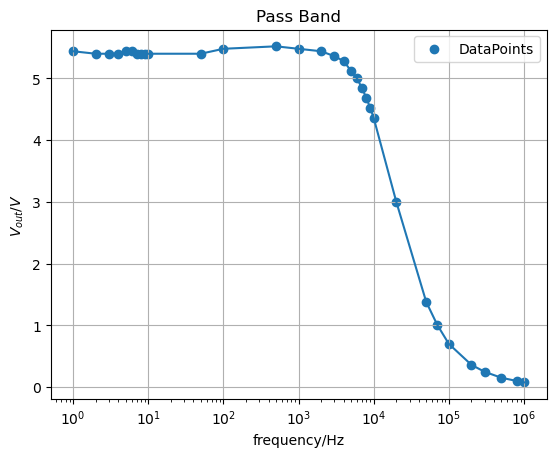

In [24]:
df = pd.read_excel('ET2_data.xlsx')

# 假设数据在前两列，你可以这样提取
freq = df.iloc[:, 0]  # 第一列数据
Vout = df.iloc[:, 1]  # 第二列数据

plt.plot(freq, Vout)
plt.scatter(freq, Vout, label='DataPoints')

# 添加标题和标签
plt.title('Pass Band')
plt.xlabel('frequency/Hz')
plt.ylabel('$V_{out}/V$')
plt.xscale("log")
plt.legend()
plt.grid('on')


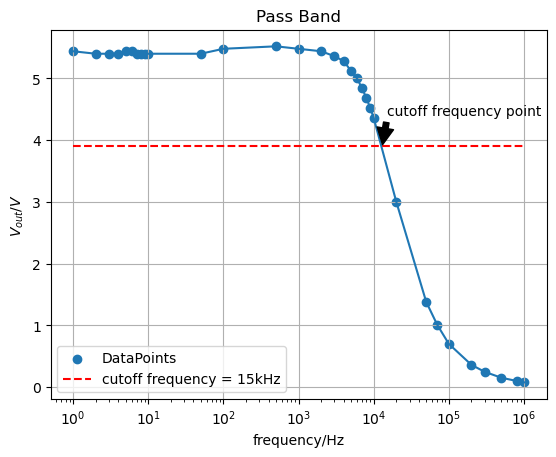

In [54]:
# 计算最大响应值
max_response = np.max(Vout)

# 计算-3dB对应的响应值
response_3db_value = max_response / np.sqrt(2)

plt.plot(freq, Vout)
plt.scatter(freq, Vout, label='DataPoints')
plt.hlines(y=response_3db_value, xmin=np.min(freq), xmax=np.max(freq), color='r', linestyle='--', label='cutoff frequency = 15kHz')

plt.annotate('cutoff frequency point',
             xy=(13000, response_3db_value),       # 箭头指向的点
             xytext=(5036.75636642135+10000, response_3db_value+0.5),  # 文本的位置
             arrowprops=dict(facecolor='black', shrink=0.05))  # 箭头的属性

# 添加标题和标签
plt.title('Pass Band')
plt.xlabel('frequency/Hz')
plt.ylabel('$V_{out}/V$')
plt.xscale("log")
plt.legend()
plt.grid('on')


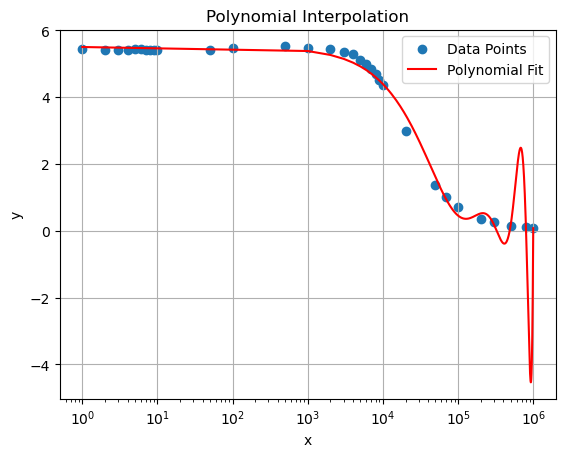

In [44]:
coefficients = np.polyfit(freq, Vout, 6)

# 使用poly1d根据系数创建一个多项式对象
polynomial = np.poly1d(coefficients)

# 生成用于绘制拟合曲线的x值
x_fit = np.linspace(np.min(freq), np.max(freq), 1000)

# 计算对应的y值
y_fit = polynomial(x_fit)

# 绘制原始数据点
plt.scatter(freq, Vout, label='Data Points')

# 绘制拟合曲线
plt.plot(x_fit, y_fit, label='Polynomial Fit', color='red')

# 添加标题和标签
plt.title('Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.xscale('log')
plt.legend()
plt.grid(True)



In [45]:
import scipy.optimize as opt

result = opt.root_scalar(polynomial - response_3db_value, method='bisect', bracket=[1e4, 2e4])
print(result.root)

15036.75636642135
